In [2]:
# 1. 기본 라이브러리 불러오기
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [3]:
# 2. CalcHistogram(img,num_bin)를 정의하기
def CalcHistogram(img,num_bin):
    h,w = img.shape
    hist = np.zeros(num_bin) # 2^bit bit=8 -> bit=3
    for i in range(0,h):
        for j in range(0,w):
            hist[img[i,j]] += 1
    return hist

In [4]:
# 3. ‘Lenna. png’를 흑백영상으로 읽은 후 영상의 크기를 자동으로 구하기
img = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE)
h,w = img.shape

In [8]:
# 4. numpy를 사용하여 영상의 min과 max 값을 구하고, 
# 중첩 반복문을 이용하여 명암 대비 스트레칭 수행하기기
low, high = np.min(img), np.max(img)
print(low, high)

result1 = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        result1[i,j] = (img[i,j]-low)/(high-low)*255
result1 = np.uint8(result1)

# 과제
result3 = np.uint8((img-low)/(high-low)*255)
print(np.array_equal(result1, result3))
print(result1)

34 240
True
[[165 165 164 ... 169 177 148]
 [165 164 164 ... 173 183 153]
 [167 163 164 ... 143 121  80]
 ...
 [ 30  33  37 ...  59  79  84]
 [ 27  33  33 ...  75  94  95]
 [ 23  33  30 ...  89 101 103]]


In [9]:
# 5. low와 high 값을 수동으로 입력하고, 
# 중첩 반복문/조건문을 이용하여 앤드-인 탐색 수행하기
low, high = 100, 200 # user parameter
result2 = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        if img[i,j] < low:
            result2[i,j] = 0
        elif img[i,j] >= low and img[i,j] <= high:
            result2[i,j] = (img[i,j]-low)/(high-low)*255
        elif img[i,j] > high:
            result2[i,j] = 255
result2 = np.uint8(result2)

temp = np.uint8((img-low)/(high-low)*255)
result4 = np.where(img>high, 255, np.where(img<low, 0, temp))

print(np.array_equal(result2, result4))
print(result4)

True
[[173 173 170 ... 181 196 137]
 [173 170 170 ... 188 209 147]
 [175 168 170 ... 127  81   0]
 ...
 [  0   0   0 ...   0   0   5]
 [  0   0   0 ...   0  25  28]
 [  0   0   0 ...  15  40  45]]


In [19]:
# 6. 입력 영상, 명암 대비 스트레칭 결과, 앤드-인 탐색 결과의 히스토그램 생성하기
num_bin = 2**8 # 255
hist = CalcHistogram(img,num_bin)
hist1 = CalcHistogram(result1,num_bin)
hist2 = CalcHistogram(result2,num_bin)

<BarContainer object of 256 artists>

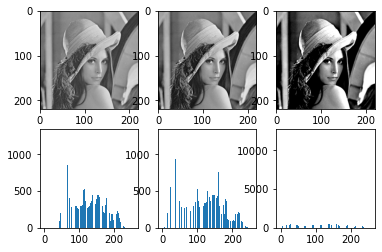

In [22]:
# 7. matplotlib.pyplot을 이용하여 결과 히스토그램을 출력하기
plt.subplot(2,3,1); plt.imshow(img, cmap='gray', norm=NoNorm())
plt.subplot(2,3,2); plt.imshow(result1, cmap='gray', norm=NoNorm())
plt.subplot(2,3,3); plt.imshow(result2, cmap='gray', norm=NoNorm())
plt.subplot(2,3,4); plt.bar(range(0,num_bin), hist)
plt.subplot(2,3,5); plt.bar(range(0,num_bin), hist1)
plt.subplot(2,3,6); plt.bar(range(0,num_bin), hist2)